# House Price Prediction using Machine Learning

This notebook demonstrates how to predict house prices using machine learning techniques. We'll go through the following steps:
- = first time through 
* = a few other times through 

1. Data Loading and Exploration
   - Load training and test datasets
   - Examine data structure and features
   - Check for missing values
   ** Go back and explore various models, look at which others have applied to the problem, and how to improve** 

2. Data Preprocessing
   - Handle missing values
   - Convert categorical variables to numerical
   - Select important features

3. Model Building
   - Split data into training and validation sets
   - Train a Random Forest model
   - Evaluate model performance

4. Make Predictions
   - Predict house prices on test data
   - Create submission file

This is a great beginner project to learn:
- Data preprocessing and cleaning
- Feature engineering
- Machine learning model training
- Model evaluation and prediction


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Display the first few rows of the training data
train_data.head()

# Data Preprocessing
# Check for missing values
missing_values = train_data.isnull().sum()
missing_values[missing_values > 0]


LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Display the first few rows of the training data
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Check for missing values
missing_values = train_data.isnull().sum()
missing_values[missing_values > 0]

# Handle missing values (example strategies)
train_data.fillna({
    'LotFrontage': train_data['LotFrontage'].mean(),
    'Alley': 'No Alley',
    'BsmtQual': 'No Basement',
    'GarageType': 'No Garage',
    'PoolQC': 'No Pool',
    'FirePlaceQu': 'No Fireplace',
    'Fence': 'No Fence',
}, inplace=True)

# Convert categorical variables to numerical (one-hot encoding)
train_data = pd.get_dummies(train_data, drop_first=True)

In [5]:
# Define features and target variable
X = train_data.drop(columns=['SalePrice'])
y = train_data['SalePrice']

In [6]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Model training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
val_predictions = model.predict(X_val)

# Model evaluation
mse = mean_squared_error(y_val, val_predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 868178900.2703407


In [8]:
# Calculate feature importance
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Get top 20 features correlated with SalePrice
correlation_matrix = train_data.corr()
top_features = correlation_matrix['SalePrice'].abs().sort_values(ascending=False).head(21).index.tolist()  # 21 to include SalePrice itself
top_features.remove('SalePrice')  # Remove SalePrice from the list

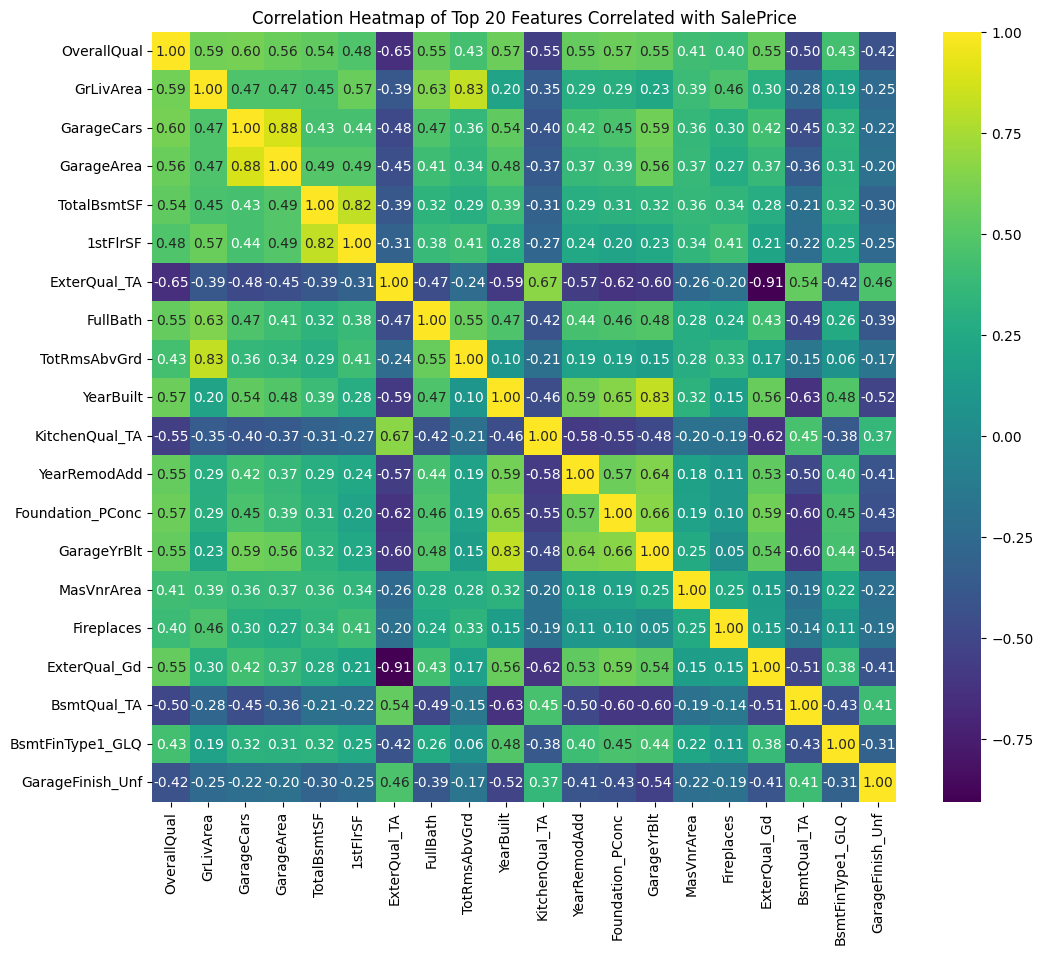

In [9]:
# Correlation heatmap for top 20 features
plt.figure(figsize=(12, 10))
sns.heatmap(train_data[top_features].corr(), annot=True, fmt=".2f", cmap='viridis')  # Using 'viridis' for clarity
plt.title('Correlation Heatmap of Top 20 Features Correlated with SalePrice')
plt.show()

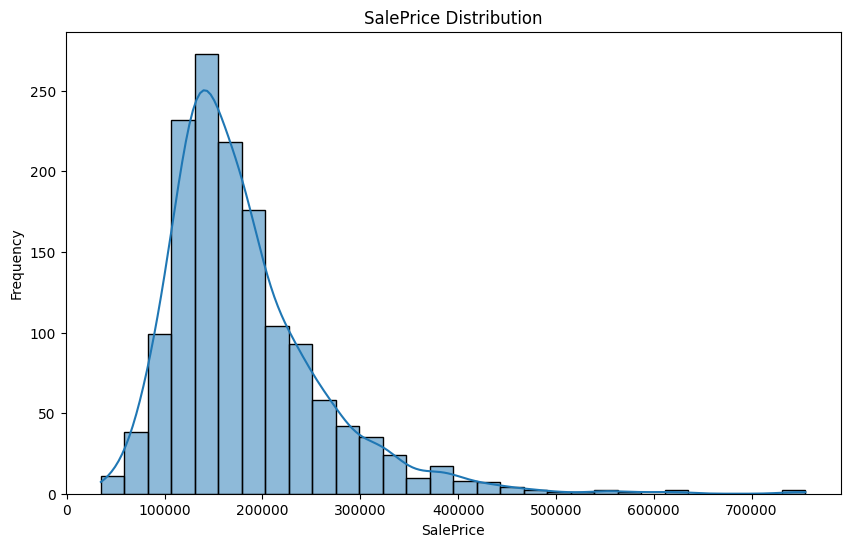

In [10]:
# Distribution of SalePrice
plt.figure(figsize=(10, 6))
sns.histplot(train_data['SalePrice'], bins=30, kde=True)
plt.title('SalePrice Distribution')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()